In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import os

In [3]:
#Load face and eye cascade first
face_cascade=cv2.CascadeClassifier("./model/haarcascades/haarcascade_frontalface_default.xml")
eye_cascade = cv2.CascadeClassifier('./model/haarcascades/haarcascade_eye.xml')
eye_cascade
face_cascade


< cv2.CascadeClassifier 000002CBC32EDD30>

In [4]:
#function to return croped image of face with 2 or more eyes
def get_cropped_image_if_2_eyes(image_path):
    try:
        img = cv2.imread(image_path)
        gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        faces = face_cascade.detectMultiScale(gray, 1.3, 5)
        for (x,y,w,h) in faces:
            roi_gray = gray[y:y+h, x:x+w]
            roi_color = img[y:y+h, x:x+w]
            eyes = eye_cascade.detectMultiScale(roi_gray)
            if len(eyes) >= 2:
                return roi_color
    except:
        return None

In [5]:
path_of_data = "./model/dataset/rawData/"
path_to_cr_data = "./model/dataset/cropped/"

In [6]:
stu_folder_list=os.listdir(path_of_data)
stu_folder_list

['Aditya Sharma',
 'Akansha Shishodia',
 'Anant Jain',
 'Deepak Singhal',
 'Divyanka Mishra',
 'Nishant Rohilla',
 'Prashant Saraswat',
 'Prerna Sharma',
 'Ritik Kamboj',
 'Ritika Tiwari',
 'Sakshi',
 'Shubham',
 'Vansh Saini']

In [7]:
# To extract facial data from raw data 
stu_file_names_dict = {}
for sName in stu_folder_list:
    stu_file_names_dict[sName]=[]
    NewDir=os.mkdir(path_to_cr_data+sName+" cropped")
    count=1
    for sNamePhoto in os.listdir(path_of_data+sName):
        sNamePhotoPath=path_of_data+sName+"/"+sNamePhoto
       # print(sNamePhotoPath)
        Ret_Img_Color=get_cropped_image_if_2_eyes(sNamePhotoPath)
        if Ret_Img_Color is not None :
           # print(sNamePhotoPath)
            Ret_Img_Path=(path_to_cr_data+sName+" cropped")+"/"+sName+str(count)+".png"
            cv2.imwrite(Ret_Img_Path,Ret_Img_Color)
            stu_file_names_dict[sName].append(Ret_Img_Path)
            
            count+=1
    

In [8]:
stu_file_names_dict

{'Aditya Sharma': ['./model/dataset/cropped/Aditya Sharma cropped/Aditya Sharma1.png',
  './model/dataset/cropped/Aditya Sharma cropped/Aditya Sharma2.png',
  './model/dataset/cropped/Aditya Sharma cropped/Aditya Sharma3.png',
  './model/dataset/cropped/Aditya Sharma cropped/Aditya Sharma4.png',
  './model/dataset/cropped/Aditya Sharma cropped/Aditya Sharma5.png',
  './model/dataset/cropped/Aditya Sharma cropped/Aditya Sharma6.png',
  './model/dataset/cropped/Aditya Sharma cropped/Aditya Sharma7.png',
  './model/dataset/cropped/Aditya Sharma cropped/Aditya Sharma8.png',
  './model/dataset/cropped/Aditya Sharma cropped/Aditya Sharma9.png',
  './model/dataset/cropped/Aditya Sharma cropped/Aditya Sharma10.png',
  './model/dataset/cropped/Aditya Sharma cropped/Aditya Sharma11.png',
  './model/dataset/cropped/Aditya Sharma cropped/Aditya Sharma12.png',
  './model/dataset/cropped/Aditya Sharma cropped/Aditya Sharma13.png',
  './model/dataset/cropped/Aditya Sharma cropped/Aditya Sharma14.png'

In [9]:
import pywt #for wavelet function
def w2d(img, mode='haar', level=1):
    imArray = img
      #print(imArray.shape)
    #Datatype conversions
    #convert to grayscale
    imArray = cv2.cvtColor( imArray,cv2.COLOR_RGB2GRAY )
    #convert to float
    imArray =  np.float32(imArray)   
    #print(imArray)
    
    imArray /= 255;
   # print(imArray)
    # compute coefficients 
    coeffs=pywt.wavedec2(imArray, mode, level=level)
   # print(coeffs)
    #Process Coefficients
    coeffs_H=list(coeffs)  
   # print(coeffs_H)
    coeffs_H[0] *= 0;  
    print(coeffs_H)

    # reconstruction
    imArray_H=pywt.waverec2(coeffs_H, mode);
    imArray_H *= 255;
    imArray_H =  np.uint8(imArray_H)

    return imArray_H

In [10]:
class_dict = {}
count = 0
for stu_name in stu_file_names_dict.keys():
    class_dict[stu_name] = count
    count = count + 1
class_dict

{'Aditya Sharma': 0,
 'Akansha Shishodia': 1,
 'Anant Jain': 2,
 'Deepak Singhal': 3,
 'Divyanka Mishra': 4,
 'Nishant Rohilla': 5,
 'Prashant Saraswat': 6,
 'Prerna Sharma': 7,
 'Ritik Kamboj': 8,
 'Ritika Tiwari': 9,
 'Sakshi': 10,
 'Shubham': 11,
 'Vansh Saini': 12}

[array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32), (array([[-2.7340692e-01, -2.4705867e-01, -4.6666658e-01, -1.2574750e+00,
        -2.6339459e+00, -4.4064941e+00, -4.8082094e+00, -3.2441177e+00,
        -2.8216910e+00, -9.5012224e-01,  5.8504891e-01],
       [-1.3497545e+00, -2.7556362e+00, -2.8471811e+00, -2.1178916e+00,
        -1.5852933e+00, -6.0196084e-01, -4.8174047e-01, -1.2997545e+00,
        -1.7973038e+00, -9.0943646e-01, -1.7965683e+0

[array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0

[array([[0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.]], dtype=float32), (array([[-0.9307592 , -1.1560051 , -0.66617644],
       [ 0.98345524, -0.320956  , -0.06972978],
       [-0.739461  ,  0.59583235, -0.36764628]], dtype=float32), array([[-3.1748762,  1.7498779, -0.3098035],
       [-0.6395817,  1.2155638,  1.3023281],
       [-0.7250004,  1.3999991,  0.9848032]], dtype=float32), array([[-0.45551467,  0.60870093, -1.5745097 ],
       [ 0.70502573,  0.50330824, -0.19767141],
       [-1.0524509 , -0.22303909, -0.06372502]], dtype=float32)), (array([[ 1.2225487 , -0.9789216 , -1.4156854 , -2.003186  , -0.4215686 ,
        -0.03186302],
       [-1.6867644 ,  1.5889703 ,  1.100735  ,  0.6526964 , -0.19215696,
        -0.46568608],
       [ 0.08627443, -1.1742643 , -0.9600489 , -1.0176471 , -0.7355392 ,
        -0.21568632],
       [ 0.52818596,  0.19142137,  0.55073506,  0.07671603,  0.3563725 ,
        -0.0053921 ],
       [-0.229657  , -0.29240203, -0.61053956, -0.17524524, -0

[array([[0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.]], dtype=float32), (array([[-0.40355405, -1.2498772 , -0.5421568 , -0.6648284 , -2.5628674 ],
       [ 0.4732838 ,  1.1762254 , -0.6335784 , -1.4905634 ,  0.02328426],
       [-0.37843046, -0.5335786 ,  0.72830796,  0.07806355,  0.21776871],
       [ 4.082475  ,  1.5626221 ,  0.49620074,  1.3909312 ,  0.18566126],
       [-3.3192396 , -3.3964453 , -0.27769667, -0.17279431,  0.13897064]],
      dtype=float32), array([[ 0.3204651 , -1.227818  , -0.9723034 ,  1.6915431 ,  1.2187495 ],
       [ 0.7115202 ,  0.95000005,  1.514951  , -1.0947309 , -0.8561282 ],
       [ 0.8426466 ,  1.0526958 ,  0.5935049 , -1.1064949 , -1.8841906 ],
       [-0.55821085,  1.892524  , -0.87659264, -1.0965681 , -2.0037994 ],
       [ 0.3738966 ,  1.5292892 , -0.9328432 ,  0.90612745, -1.6894598 ]],
      dtype=float32), array([[ 0.22659394, -0.26262242, -0.12990199,  1.

[array([[0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0.]], dtype=float32), (array([[-0.0644604 ,  1.0742649 ,  0.0979166 , -2.8680143 , -1.1502451 ,
        -0.73664224,  0.7428918 ],
       [-0.17769617, -1.0674022 , -2.0756125 , -0.61029583,  0.35698414,
        -1.2676474 , -2.4112737 ],
       [ 1.7763472 , -0.85147154, -0.32683834, -0.6084555 ,  1.597671  ,
         0.10698488, -0.7215702 ],
       [-2.247671  ,  0.23786737,  0.59374994,  0.6621324 , -2.0621326 ,
         1.8656855 ,  3.2249985 ],
       [-2.036519  ,  0.7301466 ,  0.8123761 , -0.5991421 ,  2.8362732 ,
        -1.6682593 ,  2.1377447 ],
       [ 0.30588228,  1.3215677 ,  0.09215729,  0.02647024,  1.1465685 ,
         2.7544117 ,  0.29803908],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
 

[array([[0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0.]], dtype=float32), (array([[ 2.282844  ,  0.55232835,  0.8133578 , -0.5400735 , -1.0164217 ,
         2.8466897 ,  4.2588215 ],
       [ 0.3714458 , -2.314093  , -1.9165438 , -0.23566124,  1.033088  ,
        -1.5308826 ,  0.31654373],
       [-0.9594371 , -0.8980392 , -1.2735292 , -3.1107843 , -0.07610312,
        -1.5406864 , -0.9736529 ],
       [-0.9281869 ,  1.9854172 ,  1.3821081 ,  3.7822304 ,  0.6563728 ,
         0.6859059 , -0.12193622],
       [-1.1666665 , -0.17205861,  1.7579654 ,  0.23357886,  2.2757351 ,
         0.55257344,  2.0024507 ],
       [ 0.9830881 ,  0.570711  ,  0.71004915, -1.0281858 ,  0.7158091 ,
        -1.4948529 , -2.7966912 ],
       [ 4.9174013 , -0.13553905, -1.5047791 , -0.8387254 , -0.74252397,
 

[array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32), (array([[ 1.0610288 ,  0.94472986, -0.16568668,  0.36433828,  0.65575874,
        -0.30000025, -1.5583332 , -3.0230389 , -3.505024  ,  0.04411763,
        -0.35330826, -0.76127464],
       [ 0.17071074, -0.75710756, -0.33835828, -0.63725424, -0.3783074 ,
        -0.65257275, -0.17316118, -0.717769

[array([[0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.]], dtype=float32), (array([[-0.30882335, -0.3113978 , -1.4229163 , -3.0904405 , -0.5835786 ,
         0.48480374],
       [-0.43933755,  3.5651965 ,  2.8879905 ,  4.1534305 , -0.98627466,
        -1.9357848 ],
       [ 0.15576024, -2.4877448 , -1.7514715 , -3.0618865 ,  0.5258579 ,
         1.2068626 ],
       [ 0.7984068 ,  1.6295344 ,  1.0575982 ,  1.94522   , -0.1074758 ,
         0.22205792],
       [ 0.69289213,  1.1525733 , -0.8571085 ,  0.06372536,  0.6340683 ,
         0.59411746],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ]], dtype=float32), array([[-3.2799017e+00, -3.9865112e-01,  1.7634869e-01,  1.0725479e+00,
        -1.1098037e+00,  0.0000000e+00],
       [-2.0238957e+00,  3.6764145e-03, -1.0607843e+00, -1.9877434e-01,
         3.

[array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32), (array([[ 0.22953476,  0.46507335, -0.31838217, -2.6808825 , -1.0471812 ,
        -1.70098   , -3.3419108 , -2.9566169 ,  0.05343125,  0.23627439,
         0.7213236 ,  0.00710731],
       [ 1.1274518 , -0.35576004, -2.1772063 , -0.20110317,  0.12622407,
        -0.02696083, -0.48504817, -0.667279

[array([[0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.]], dtype=float32), (array([[-2.4828337e-01,  9.8049641e-04, -4.6078399e-02],
       [ 2.8984065e+00,  2.2810047e+00, -5.8823512e-03],
       [ 0.0000000e+00,  0.0000000e+00,  0.0000000e+00]], dtype=float32), array([[ 4.359312 ,  2.6227934,  0.       ],
       [-0.8545327,  2.8241415,  0.       ],
       [-3.1725488,  3.474509 ,  0.       ]], dtype=float32), array([[-0.05882217,  2.299509  ,  0.        ],
       [ 1.8104168 , -0.69938713,  0.        ],
       [ 0.        ,  0.        ,  0.        ]], dtype=float32)), (array([[ 0.36102924, -0.7237746 , -0.4181372 , -1.0061272 ,  0.04117647],
       [ 0.09019611, -0.5401961 ,  0.62107825, -0.2943627 , -0.03235293],
       [ 1.0727941 ,  0.7438723 , -0.14313693,  0.63504875, -0.12745094],
       [ 1.0825977 , -0.7514702 ,  0.06740224,  1.0296566 ,  0.027451  ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ]],
      dtype=float32), array([[ 1.7139707 , -

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



[array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.

[array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.,

[array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0.

[array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32), (array([[-6.02083206e-01, -1.84546590e+00, -1.73149467e+00,
        -2.00980377e+00, -2.53553820e+00, -2.39497519e+00,
        -3.50306296e+00, -3.08259749e+00, -2.11274058e-01,
        -3.62744421e-01],
       [-1.27769589e+00, -1.58211187e-01, -5.51415980e-03,
        -4.53798831e-01, -5.50735593e-01, -6.05391562e-01,
        -1.06741115e-01,  1.82230830e-01, -7.55392194e-01,
        -2.09926367e-01],
       [-2.37867370e-01, -2.20583081e-02,  2.71323538e+00,
         3.75416660e+00,  

[array([[0., 0.],
       [0., 0.]], dtype=float32), (array([[0.01433897, 0.8333329 ],
       [2.8366418 , 2.0843134 ]], dtype=float32), array([[-5.9393377 , -0.14705849],
       [-1.7714467 ,  1.9803915 ]], dtype=float32), array([[-3.3868873 ,  0.03798947],
       [ 0.50649416,  1.2318627 ]], dtype=float32)), (array([[-0.5906863 , -0.46053997, -0.86249983,  0.4710782 ],
       [-1.7558824 , -1.9509801 , -2.4990196 , -0.432598  ],
       [ 2.2487736 ,  1.2210786 ,  1.830637  ,  0.4835785 ],
       [ 2.3090687 ,  1.9365199 ,  1.4080878 , -0.03700982]],
      dtype=float32), array([[-1.2666667 , -0.5992651 ,  3.1360285 , -2.882352  ],
       [-3.1044118 , -1.6676469 ,  0.06813693, -1.733578  ],
       [-1.7796562 ,  0.9240198 , -1.0301471 ,  0.2654419 ],
       [-0.4629898 , -0.42230392,  1.2835782 , -1.4149511 ]],
      dtype=float32), array([[ 1.2186273 , -0.3080884 ,  0.6026958 ,  0.4068626 ],
       [-0.1480391 , -0.17941248,  0.07745063, -0.95269585],
       [ 0.22230446,  0.6343143 

[array([[0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.]], dtype=float32), (array([[-2.4178917 , -1.6125    , -0.70061314, -1.0398285 , -1.5360297 ],
       [-1.4023278 , -0.83676463,  1.7452203 ,  0.48811245,  1.2409316 ],
       [ 1.5859065 ,  0.56078374, -0.11642209, -1.2311274 ,  0.09632342],
       [ 0.12402047, -0.8253678 ,  0.46237722,  1.418628  ,  1.2117647 ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ]],
      dtype=float32), array([[-1.7306371 , -2.0188713 ,  0.62585735,  2.9501224 ,  0.        ],
       [-1.2778192 ,  0.67622566,  2.5329652 ,  0.01629925,  0.        ],
       [-4.4628673 ,  0.17818642,  1.5828428 ,  1.3821087 ,  0.        ],
       [-5.186029  ,  1.0623779 , -0.15796614,  1.8656869 ,  0.        ],
       [-1.6487741 , -0.10661793,  1.6791663 ,  0.44093204,  0.        ]],
      dtype=float32), array([[ 1.507843  , -0.61642164,  0.01801491, -0.

[array([[0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0.]], dtype=float32), (array([[-0.06017166, -0.579044  , -4.2193613 , -3.858332  , -2.9531865 ,
        -0.94963217,  0.18823507],
       [-0.88737714,  1.7682592 ,  2.2833323 ,  1.9140934 ,  2.9495087 ,
        -0.952451  , -0.8745098 ],
       [-1.372549  , -2.7844357 , -2.1       , -1.8123771 , -2.6747546 ,
        -3.0263476 , -5.6823545 ],
       [ 0.03051448,  0.39742488,  1.8671565 ,  1.2069845 , -0.613971  ,
         0.17794132,  0.5313706 ],
       [ 0.26409334,  1.7484063 , -0.31960797, -0.3125    ,  3.0109062 ,
         3.8301463 ,  1.7235296 ],
       [ 0.6493875 ,  0.88615215,  1.5681372 ,  3.283945  ,  2.7696075 ,
        -2.1087005 ,  2.403921  ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
 

[array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.

[array([[0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32), (array([[ 0.5718139 ,  0.32365188, -0.14191197, -5.256985  , -6.7004895 ,
        -4.6436267 , -0.40220547,  0.3460789 ],
       [-0.78345585, -2.8105392 , -1.7343134 ,  0.20735472, -0.02524664,
        -0.36213213, -0.09203388,  0.26102722],
       [-1.2099268 , -0.9833332 , -0.01323512,  1.277206  ,  2.340074  ,
         2.9122543 , -0.48394626,  1.821323  ],
       [-1.5127451 , -1.7071078 , -2.6497545 , -0.43112683, -2.3928916 ,
        -3.0382347 , -0.31678885, -2.0870087 ],
       [-0.06188776,  1.0537972 ,  1.0200977 ,  3.4481614 ,  0.99730366,
         0.8873779 ,  0.16642071,  0.11274518],
       [-0.39056337,  3.2088232 , -2.9747546 , -

[array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0

[array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0.],
       [0., 0., 0., 

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



[array([[0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.]], dtype=float32), (array([[-0.07683817, -2.1572297 , -3.0300236 , -4.384804  ,  0.4063718 ],
       [ 0.11286741,  0.01972994,  0.46568626,  2.7648282 , -2.6115184 ],
       [-1.626838  ,  1.0556369 ,  2.8381126 ,  0.09301506,  0.6803911 ],
       [ 0.20392095, -0.8379899 , -0.4797795 ,  0.76066196,  2.1242645 ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ]],
      dtype=float32), array([[ 2.6197298 , -0.88713217,  0.01188707, -1.4571075 ,  0.        ],
       [ 0.5486522 ,  0.08149529,  1.7651956 , -3.4069848 ,  0.        ],
       [ 1.0270829 ,  0.9568629 , -1.3162994 , -2.2214465 ,  0.        ],
       [ 0.08897018,  0.02622557, -0.10526943, -1.6812496 ,  0.        ],
       [-0.3382349 , -0.96348   , -0.09509802, -3.4026957 ,  0.        ]],
      dtype=float32), array([[-0.06850473, -0.03737783,  0.1768384 ,  0.

[array([[0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.]], dtype=float32), (array([[-4.12989885e-01, -3.26090670e+00, -4.73909235e+00,
        -3.83848000e+00, -4.16102934e+00, -6.72793508e-01],
       [-1.95098758e-01,  2.63112736e+00,  1.39595592e+00,
         4.05073452e+00, -9.80734825e-04, -9.90563214e-01],
       [-1.89399469e+00, -2.72034240e+00, -2.10551381e+00,
        -3.36507368e+00, -1.26066208e+00, -1.55796671e+00],
       [ 1.00465703e+00,  8.74878526e-01,  2.40992546e+00,
         1.50330997e+00,  4.42524016e-01,  7.96078026e-01],
       [-1.33308792e+00, -1.49326038e+00,  3.74877334e-01,
        -1.67904282e+00,  1.34804159e-01, -5.51911736e+00],
       [-1.19239844e-01, -4.68749136e-01,  1.99583220e+00,
         2.33112836e+00, -4.45589274e-01, -3.88489403e-02]], dtype=float32), array([[ 3.997548  , -1.3621325 , -0.9393387 , -0.13

[array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0.

[array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0

[array([[0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0.]], dtype=float32), (array([[-0.06176476, -0.94227946, -1.5511024 , -3.223407  , -3.007965  ,
         1.6310045 ,  2.5397058 ],
       [-1.5488968 , -1.8572304 ,  1.3063723 ,  0.00882387, -0.8227945 ,
        -1.5908086 ,  0.25024506],
       [-0.11777011, -2.1683822 ,  1.2376226 , -1.0551469 ,  0.20784195,
        -0.87132335, -3.2546566 ],
       [-0.4883579 , -0.05220512, -1.8491412 ,  0.27867562, -0.8585785 ,
        -0.34644574, -0.14068618],
       [-0.26397076,  1.0781858 , -0.5149504 ,  1.8121328 ,  0.7942398 ,
        -0.02230276, -0.5286752 ],
       [ 1.2715685 ,  0.93321025, -0.15330899, -0.59227955, -0.84252286,
        -0.01544192,  0.5747549 ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
 

[array([[0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.]], dtype=float32), (array([[ 0.01715688, -4.7011023 , -6.214582  , -5.9176455 ,  0.94620085,
         0.597794  ],
       [-0.5824752 ,  0.851716  ,  2.2408087 ,  4.654166  , -1.022181  ,
        -0.20404537],
       [-1.7715685 , -1.69473   , -2.633946  , -4.784068  , -2.9014702 ,
         0.97377527],
       [ 0.16335762,  0.5511031 ,  0.9301475 ,  1.5916669 ,  0.90196013,
        -0.53149366],
       [ 2.3219366 ,  0.0193626 , -1.2308825 , -2.1175241 , -0.57303834,
         0.33762255],
       [-1.4830875 ,  0.74791706,  3.5871322 ,  3.8133569 ,  0.2550245 ,
         0.91936266]], dtype=float32), array([[ 0.2014705 , -2.5469363 , -0.42267227,  1.1894608 , -1.0312498 ,
        -0.653924  ],
       [-2.2866416 ,  0.53161716, -0.9795351 ,  0.7865195 ,  4.7140927 ,
        -0.6621313 ],
      

[array([[0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0.]], dtype=float32), (array([[ 0.5846816 , -3.7275734 , -5.8651953 , -4.6312494 , -1.6688725 ,
         1.7030629 , -0.01666655],
       [-0.5562499 , -0.8316173 ,  0.84583396,  2.3183818 ,  0.5481622 ,
        -1.3465688 , -0.14215559],
       [-2.8029408 ,  0.48149502, -0.8856616 , -2.5251226 , -1.9725488 ,
         0.06997526, -0.12450988],
       [ 0.87536657, -1.4795334 , -1.3698531 ,  3.7159305 ,  0.41813686,
         0.06409389, -0.08946124],
       [-2.3599262 ,  1.5963237 ,  2.577819  ,  0.79754865,  2.233823  ,
        -0.17377415, -0.02034378],
       [-0.1602939 , -0.11078483,  0.2667892 , -2.7805138 ,  1.2329663 ,
        -0.83553934, -0.02745277],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
 

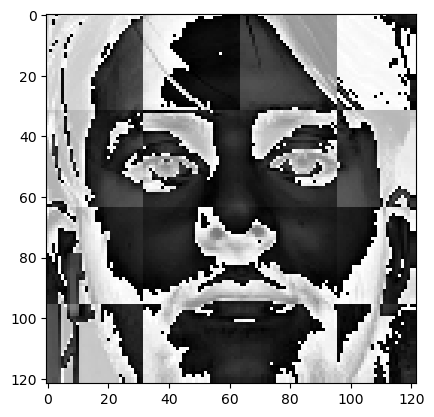

In [41]:
X,y=[],[]
for stu_name, training_files in stu_file_names_dict.items():
    for training_image in training_files:
        img = cv2.imread(training_image)
        scalled_raw_img = cv2.resize(img, (200, 200))
        img_har = w2d(img,'db1',5)
        scalled_img_har = cv2.resize(img_har, (200, 200))
        plt.imshow(img_har,cmap='gray')
        combined_img = np.vstack((scalled_raw_img.reshape(200*200*3,1),scalled_img_har.reshape(200*200,1)))
        X.append(combined_img)
        y.append(class_dict[stu_name]) 

In [44]:
len(X)

209

In [45]:
len(y)

209

In [46]:
X = np.array(X).reshape(len(X),160000).astype(float)
X.shape

(209, 160000)

In [47]:
X[0].shape

(160000,)

In [48]:
"""
#test
path_tst_img=path_of_data+stu_folder_list[0]+"/"+os.listdir(path_of_data+stu_folder_list[0])[0]
print(os.listdir(path_of_data+stu_folder_list[0])[0])
print(path_tst_img)
#Test=cv2.imread(path_tst_img)
#plt.imshow(Test)
#ret_img=get_cropped_image_if_2_eyes(path_tst_img)
img = cv2.imread(path_tst_img)
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(gray,cmap='gray')
faces = face_cascade.detectMultiScale(gray, 1.3, 5)
(x,y,w,h)=faces[0]
print(x,y,w,h)
roi_gray = gray[y:y+h, x:x+w]
plt.imshow(roi_gray)
roi_color = img[y:y+h, x:x+w]
 #           eyes = eye_cascade.detectMultiScale(roi_gray)
  #          if len(eyes) >= 2:
   #             return roi_color
#plt.imshow(ret_img)
"""

'\n#test\npath_tst_img=path_of_data+stu_folder_list[0]+"/"+os.listdir(path_of_data+stu_folder_list[0])[0]\nprint(os.listdir(path_of_data+stu_folder_list[0])[0])\nprint(path_tst_img)\n#Test=cv2.imread(path_tst_img)\n#plt.imshow(Test)\n#ret_img=get_cropped_image_if_2_eyes(path_tst_img)\nimg = cv2.imread(path_tst_img)\ngray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)\nplt.imshow(gray,cmap=\'gray\')\nfaces = face_cascade.detectMultiScale(gray, 1.3, 5)\n(x,y,w,h)=faces[0]\nprint(x,y,w,h)\nroi_gray = gray[y:y+h, x:x+w]\nplt.imshow(roi_gray)\nroi_color = img[y:y+h, x:x+w]\n #           eyes = eye_cascade.detectMultiScale(roi_gray)\n  #          if len(eyes) >= 2:\n   #             return roi_color\n#plt.imshow(ret_img)\n'

# Let's train the model


In [49]:
from sklearn import svm
from sklearn.model_selection import train_test_split

In [53]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
len(y_test),X_test.shape

(42, (42, 160000))

In [54]:
svm_model=svm.SVC(C=10)
svm_model.fit(X_train,y_train)
svm_model.predict(X_test)==y_test

array([False, False, False, False,  True,  True, False, False,  True,
        True,  True,  True,  True,  True, False, False,  True,  True,
        True, False, False,  True, False, False, False, False, False,
       False,  True, False,  True,  True, False,  True,  True, False,
        True,  True, False,  True,  True, False])

In [55]:
svm_model.score(X_test,y_test)

0.5

44 58 256 256
[array([[0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32), (array([[ 0.3791667 , -0.31556338, -1.1286769 , -0.70477927, -0.4121318 ,
        -1.2020829 ,  0.4720587 , -0.05379894],
       [ 0.19448511, -1.091299  , -0.8854169 , -0.19007318, -0.14031866,
        -0.5812502 , -0.5845587 ,  0.10441156],
       [ 0.10147022, -0.55551434,  0.95772034,  1.414338  ,  1.1770838 ,
         0.30049017, -0.4651963 , -0.30134863],
       [-0.76323575, -2.0692399 , -2.9764705 , -1.8421571 , -1.9602941 ,
        -2.3857837 , -1.2480395 , -0.12598065],
       [-0.53933805,  0.9882336 ,  0.8623771 ,  0.6475489 ,  0.50490135,
         0.21531813,  0.05784301, -0.11850412],
       [-0.1817399 ,  0.54742724, 

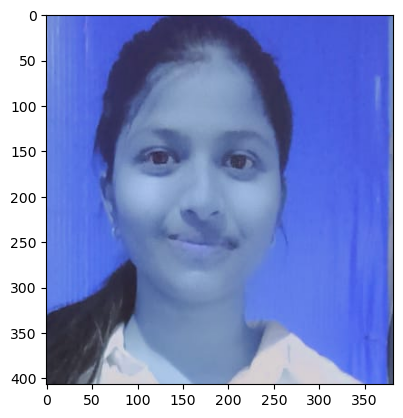

In [56]:
# For Test
import cv2 
img1 = cv2.imread("./model/testImg/testRt.png")
plt.imshow(img1)
faces = face_cascade.detectMultiScale(img1, 1.3, 5)
(x,y,w,h)=faces[0]
print(x,y,w,h)
img1 = img1[y:y+h, x:x+w]
scalled_raw_img1 = cv2.resize(img1, (200, 200))
img_har1 = w2d(img1,'db1',5)
scalled_img_har1 = cv2.resize(img_har1, (200, 200))
#plt.imshow(scalled_raw_img,cmap='gray')
combined_img1 = np.vstack((scalled_raw_img1.reshape(200*200*3,1),scalled_img_har1.reshape(200*200,1)))

In [57]:
list1=[]
list1.append(combined_img1)
list1 = np.array(list1).reshape(len(list1),160000).astype(float)
list1.shape

(1, 160000)

In [58]:
result=svm_model.predict(list1)
for k,v in class_dict.items():
    if v==result[0]:
        print(k)

Ritika Tiwari


In [59]:
import joblib
joblib.dump(svm_model,"saved_model_for_SNC.pkl")

['saved_model_for_SNC.pkl']

In [60]:
import json
with open("stu_class_dict.json","w") as f:
    f.write(json.dumps(class_dict))